<a href="https://colab.research.google.com/github/archivesunleashed/notebooks/blob/main/arch/arch_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with ARCH Derivatives

In this notebook we'll setup an environment and download some example derivatives from Archive-It's ARCH service to demostrate some examples of further exploring web archive derivative datasets.



# Datasets

First, we will need to download some derivative data from ARCH. In this notebook, we'll be taking a look at the image information and domain frequency output.

In [ ]:
%%capture

!mkdir data

!curl "https://webdata.archive-it.org/ait/1796/research_services/download/ARCHIVEIT-14489/AudioInformationExtraction/audio-information.csv.gz?access=F3NNK4MUUJWBR4TLK23BLTGIF3YW6AKA" --output data/audio-information.csv.gz
!curl "https://webdata.archive-it.org/ait/1796/research_services/download/ARCHIVEIT-14489/DomainFrequencyExtraction/domain-frequency.csv.gz?access=7CDK66VK7CTOZBT3GMUAYWETEYJRCHBA" --output data/domain-frequency.csv.gz
!curl "https://webdata.archive-it.org/ait/1796/research_services/download/ARCHIVEIT-14489/DomainGraphExtraction/domain-graph.csv.gz?access=WE6SCHFHA2JSYIVWS6UFDGWRFRYD42WK" --output data/domain-graph.csv.gz
!curl "https://webdata.archive-it.org/ait/1796/research_services/download/ARCHIVEIT-14489/ImageGraphExtraction/image-graph.csv.gz?access=QEH6FZBZGHCCTBPKVRLLRZBNWESHJPL6" --output data/image-graph.csv.gz
!curl "https://webdata.archive-it.org/ait/1796/research_services/download/ARCHIVEIT-14489/ImageInformationExtraction/image-information.csv.gz?access=XCE35J3VE5YC2DGFDH4PHHQARDFEMH3S" --output data/image-information.csv.gz
!curl "https://webdata.archive-it.org/ait/1796/research_services/download/ARCHIVEIT-14489/PdfInformationExtraction/pdf-information.csv.gz?access=E2ZGZIMJOJMMYPZAYKIXAJW7R5NZQFM3" --output data/pdf-information.csv.gz
!curl "https://webdata.archive-it.org/ait/1796/research_services/download/ARCHIVEIT-14489/PresentationProgramInformationExtraction/powerpoint-information.csv.gz?access=IUZT75SHXCYYQD3WTVVOQMFDMKFVIHGG" --output data/powerpoint-information.csv.gz
!curl "https://webdata.archive-it.org/ait/1796/research_services/download/ARCHIVEIT-14489/SpreadsheetInformationExtraction/spreadsheet-information.csv.gz?access=T47SEW5YEQCNIIVHXXMMN7OMQPTFQFCE" --output data/spreadsheet-information.csv.gz
!curl "https://webdata.archive-it.org/ait/1796/research_services/download/ARCHIVEIT-14489/VideoInformationExtraction/video-information.csv.gz?access=GBGWDM4PLPTS44VBJZJ774DNNIKLXWJX" --output data/video-information.csv.gz
!curl "https://webdata.archive-it.org/ait/1796/research_services/download/ARCHIVEIT-14489/WebGraphExtraction/web-graph.csv.gz?access=Y3SJNUSJZ5XQ7QW6A4KZHILNEX32M43H" --output data/web-graph.csv.gz
# Web pages is too large to work with in Colab
#!curl "https://webdata.archive-it.org/ait/1796/research_services/download/ARCHIVEIT-14489/WebPagesExtraction/web-pages.csv.gz?access=QVWTN5PNK6XVRR43UIF2RH43CPE5EEIU" --ouput data/web-pages.csv.gz
!curl "https://webdata.archive-it.org/ait/1796/research_services/download/ARCHIVEIT-14489/WordProcessorInformationExtraction/word-document-information.csv.gz?access=GIYLGB4MVQDU63EGN2C4HACYDQPMTZ3P" --output data/word-document-information.csv.gz

!gunzip data/*

Let's make sure they've downloaded, and then we can proceed.


In [3]:
!ls -1 data

audio-information.csv
domain-frequency.csv
domain-graph.csv
image-graph.csv
image-information.csv
powerpoint-information.csv
spreadsheet-information.csv
video-information.csv
web-graph.csv
word-document-information.csv


# Environment

Next, we'll setup our environment so we can load our derivatives into [pandas](https://pandas.pydata.org).

In [4]:
import numpy as np
import pandas as pd

# Data Table Display

Colab includes an extension that renders pandas dataframes into interactive displays that can be filtered, sorted, and explored dynamically.

Data table display for Pandas dataframes can be enabled by running:
```python
%load_ext google.colab.data_table
```
and disabled by running
```python
%unload_ext google.colab.data_table
```

Note: There appears to be a limit to how many rows can be used in the Data Table display. It doesn't work with all examples in this notebook.


In [5]:
%load_ext google.colab.data_table

# Loading our ARCH Datasets as DataFrames

---



Next, we'll setup our datasets as pandas DataFrames to work with, and show a preview of each.


## Collection

A basic overview of the collection.


### Domains

This derivative contains basic information about what's been collected in the crawl. Specifically we can analyze how often pages from each domain appear.

Note: You can also take of advantage the Data Table extension to experiment with interacting with the DataFrames from here on out.

In [6]:
domains = pd.read_csv('data/domain-frequency.csv')
domains

domain  count
0              mentorlink.ucalgary.ca  15815
1                  events.ucalgary.ca  15107
2                 portal.uwaterloo.ca  13074
3                   clare.ucalgary.ca  12886
4                 english.ucalgary.ca  12775
...                               ...    ...
2106  bmcpsychiatry.biomedcentral.com      1
2107                       wts.uwo.ca      1
2108           facilities.mcmaster.ca      1
2109            rwoldford.netlify.app      1
2110                     esj.usask.ca      1

[2111 rows x 2 columns]

## Network
These derivative files provide network graphs for analysis, and offer an opportunity to explore the way websites link to each other.



### Domain Graph

In [15]:
domain_graph = pd.read_csv('data/domain-graph.csv')
domain_graph

crawl_date  ...   count
0        20200706  ...  187836
1        20200719  ...  151647
2        20200709  ...  123500
3        20200716  ...  116359
4        20200709  ...  108765
...           ...  ...     ...
98392    20200705  ...       6
98393    20200713  ...       6
98394    20200701  ...       6
98395    20201230  ...       6
98396    20200714  ...       6

[98397 rows x 4 columns]

### Image Graph


In [16]:
image_graph = pd.read_csv('data/image-graph.csv')
image_graph

ParserError: ignored

### Web Graph

In [17]:
web_graph = pd.read_csv('data/web-graph.csv')
web_graph

ParserError: ignored

## File Formats

These derivatives contain information on certain types of binary files found within a web archive.

### Audio

The following commands create a variable called `images` is a DataFrame with all of the image information from the web archive, and then preview the DataFrame.



In [7]:
audio = pd.read_csv('data/audio-information.csv')
audio

crawl_date  ...                                      sha1
0      20200706  ...  c46451acd2b0528d2ef956c543ec0bb616cf3f36
1      20200706  ...  c51b21be4a37dd1c1104fe4dac72471769b51344
2      20200706  ...  c18ebd1c33493efb0ad0f5e07035152e7a8b506b
3      20200706  ...  a7440c0e6bec0f3bb427e2d0981fb096c8863dc9
4      20200629  ...  c94151f8f6f94821608f4fdc8488e0e1e6198478
..          ...  ...                                       ...
825    20210701  ...  3570b867db07ad9de334308f5c17da8eae01f657
826    20210701  ...  d52fbe3874f406697795c11d8c7773b421da0c64
827    20210701  ...  6751972efb5dbcce9bf1bbed6579a5601a67688e
828    20210701  ...  3130e23db45dc283e68b4fbd193b27d6add82126
829    20210702  ...  e6931edc7d1f6824be17cdc90c9bbdc28fe3965f

[830 rows x 8 columns]

### Images

The following commands create a variable called `images` is a DataFrame with all of the image information from the web archive, and then preview the DataFrame.

In [8]:
images = pd.read_csv('data/image-information.csv')
images

crawl_date  ...                                      sha1
0         20200629  ...  2a7d99f6736f627d7b210e74e3cf8accc60b04e9
1         20200629  ...  cb236de6bbab973e966842cb5ba15aec43156740
2         20200629  ...  870718bdc7b4ef4e1641a34fd9b7a10b262748c1
3         20200629  ...  7a3bb6073707f07e7acfe73138a6100024797704
4         20200629  ...  954a224b03f8600c01b6ecb3ce491221f3d1e13b
...            ...  ...                                       ...
284855    20210704  ...  4372aea305f5a6dcc6cd02d1c4d476cc95ea885a
284856    20210704  ...  fb44f9672988e7098d58fdea95cc97df6a5e4715
284857    20210704  ...  6539cd170d5586ee917f07019d35854ae90b149e
284858    20210704  ...  442f106dad41bf42e1dfc598a80d9180cd2a5ccd
284859    20210704  ...  f7d54e3a4371c365c2fcfab44c69612f4a6b4a58

[284860 rows x 10 columns]

### PDFs

In [9]:
pdf = pd.read_csv('data/pdf-information.csv')
pdf


FileNotFoundError: ignored

### PowerPoint (all software types) information

In [10]:
powerpoint = pd.read_csv('data/powerpoint-information.csv')
powerpoint


crawl_date  ...                                      sha1
0     20200630  ...  f8fdc8e66b1c549e71792bcb44410d591bf27e3a
1     20200701  ...  b76280ccae619259a2d195cb8bad4fa25cc17055
2     20200703  ...  7a198a6d23f33b635fd3685596740ae3a75fdd2d
3     20200716  ...  3869e96c0cfe1b6b29618515fc8054afdc9144ce
4     20200716  ...  caed1d01f4af5901b358f7df1f0aea1ec9a4ed02
5     20200716  ...  3f6dfdbc43f730e8dcf85dd8b7db4392642ec1db
6     20200716  ...  99001b57945fd91fbc5644015c272bd78290a4c1
7     20200716  ...  e1d19676a1d6e97cb04a0590e35bd4962a6d405c
8     20200716  ...  5490c797680199deb4f254d88295e19cae08099d
9     20200716  ...  8f2afeaa973a1dce3482df67f8853e6c60b991f2
10    20200716  ...  bc39b2b604f54d2dc4dd234378766461a2872c8f
11    20200716  ...  56500ed334bbcc34181bd087530df8e13f26f30d
12    20200716  ...  3f1f64cda2fb6e7f53fe91bd32daf3e5ef987ed0
13    20200716  ...  29d30c70fb889296031d32a8f0440993c11cb002
14    20200716  ...  d975eac237c7f7c84df3d3165f1fd34f443093ef
15    20200716  ...  114597f5a7d1822e21e238aec03c05183dfbcb86
16    20200716  ...  d86eb673c115ed6c1352630b0a02363a35f0ee87
17    20200716  ...  9d7bed651036c0cc5599c3609082d0317d66864e
18    20200716  ...  77aa7803a54fb05fbaf438a76fd19efa2411d08c
19    20200716  ...  f843004197c745af93c5a0ec7bf2f146b872b91d
20    20200716  ...  a795ddadbc7cb90fa86dadfa0819211550ff56b6
21    20200716  ...  3aa7fa51ad63cd4d02a12efb7878a2718e819aee
22    20200716  ...  ab27745479580da8c087ce946ff38b629d0cf0ad
23    20200716  ...  6dee8a6c3fe2257ff392f5aa319b4a50bf4a8a10
24    20200716  ...  73966cbaefbeed6d285a1bf06f87d29ad5eba0b7
25    20200716  ...  78c01cc6488b1e7342265494f6468b68cc329b0c
26    20200716  ...  fd08db993f52126370148f6777608786bc1090b7
27    20210102  ...  7a198a6d23f33b635fd3685596740ae3a75fdd2d

[28 rows x 8 columns]

### Spreadsheets

In [11]:
spreadsheet = pd.read_csv('data/spreadsheet-information.csv')
spreadsheet

crawl_date  ...                                      sha1
0      20200630  ...  2d4fb457a4e2c6dfc55f5757879f922dcd2a156f
1      20200702  ...  d6d893c83d629d1adf6d1291473cda9ee2abe0bb
2      20200702  ...  6b9a961623b97d896224fe885566a0d04225b618
3      20200703  ...  7bef408a4d591bae6f170392760ab5a593865753
4      20200703  ...  60aa57388a57ce2fb778555b9576babab13142d4
..          ...  ...                                       ...
971    20210702  ...  da39a3ee5e6b4b0d3255bfef95601890afd80709
972    20210702  ...  da39a3ee5e6b4b0d3255bfef95601890afd80709
973    20210702  ...  be9362cacbd5d82d4659f7929a4a7a439cfd12eb
974    20210702  ...  da39a3ee5e6b4b0d3255bfef95601890afd80709
975    20210702  ...  da39a3ee5e6b4b0d3255bfef95601890afd80709

[976 rows x 8 columns]

### Videos

In [12]:
video = pd.read_csv('data/video-information.csv')
video

crawl_date  ...                                      sha1
0       20200629  ...  856a123685f8afe9ae33d6e30f67cbed3f3d492f
1       20200629  ...  5cf1c6103e887fc7a0171ef49e69135849d04637
2       20200629  ...  6047217158775068a288fccb3b8a2c424dfc6fb4
3       20200630  ...  d57c43c1a3d1b1be4e4ef0d4f702a205b293a086
4       20200630  ...  53e67f550068b1c1d3cddcf6c74e21ec1abffce8
...          ...  ...                                       ...
6125    20210630  ...  379a004ef757b405c6711d012bea3ea1ce283a51
6126    20210701  ...  0208a764f06d28dd9adb36e4a6d32d7ca08e3fd8
6127    20210701  ...  74e2ac4eb11db8537a54c020d57ab183e3d2fa4b
6128    20210702  ...  029d92d06ee1ec159d047c35b77fb57f624a34e3
6129    20210702  ...  49cc718eaa98a5db2c8d77ceb788780e2193c72a

[6130 rows x 8 columns]

### Word Documents (all software types)

In [14]:
word = pd.read_csv('data/word-document-information.csv')
word

crawl_date  ...                                      sha1
0     20200703  ...  9200fae6eddc8b2ebab3f5677bebcddbf3358c30
1     20200708  ...  394883aa96d96b6fc7bd2286552a60cabc804133
2     20200708  ...  134d96ada8d0975f3d738c09e06d9ee88afb7da1
3     20200708  ...  51f4e3698bfa141e3ae60cfd8a85381c6cb3bbbc
4     20200710  ...  25defc402ea989d52298f0fa10a1663ce89c3137
5     20200710  ...  0563b660035365b4cb693ed8894be7d9f85e6a65
6     20200710  ...  3cdbccf14e71b5d633f69e223916c76111e7538b
7     20200714  ...  d470119ee7c91dc3eb95dc1f29fde9056362ad89
8     20200714  ...  91ccff7150116f8d916e22bb7a84c03f5515c441
9     20200714  ...  4ccb6aba7781fda57a161ddc2fa07ecd74995a1e
10    20200702  ...  3d58dfce44ed66828f290c79cd4fac3af0cee6a3
11    20200703  ...  dc9980a46c2952c67ad637803bef1b24e7a19a0f
12    20200703  ...  eb6ed0c7c295ea1bf8b1aee7cf2b25f12687de83
13    20200703  ...  b5a0dd8a1a3ea6465660443adcf2d993a6df8d71
14    20200703  ...  ea0140f16c930691ec183a8c6908e89d95499bbe
15    20200704  ...  88ea28f21b55e06daa736f43285f321a13a91da9
16    20200705  ...  c76bee3ab808cdd68f3aef1c3ad4aadc868eb088
17    20200707  ...  34ef7aedaeb0e75f4934fa4dfdf82001da1c1e22
18    20200716  ...  912bbd256c88e1c077adc05ed8bdf1ed07bb5bed
19    20200718  ...  6fa1587b8340b064ac0b50d6efa337d7d42a0421
20    20210102  ...  3d58dfce44ed66828f290c79cd4fac3af0cee6a3

[21 rows x 8 columns]

# Data Analysis

Now that we have all of our datasets loaded up, we can begin to work with them!

## Counting total files, and unique files



#### Count number of rows (how many images are in the web archive collection).


In [ ]:
images.count()

crawl_date              2635889
url                     2635889
filename                2629110
extension               2635889
mime_type_web_server    2635843
mime_type_tika          2635889
width                   2635889
height                  2635889
md5                     2635889
sha1                    2635889
dtype: int64

 #### How many unique images are in the collection?

 We can see if an image is unique or not by computing an [MD5 hash](https://en.wikipedia.org/wiki/MD5#MD5_hashes) of it. The exact same image might be called `example.jpg` and `foo.jpg` - by computing the hash, we can see that even with different file names, they are actually the same image!




In [ ]:
len(images.md5.unique())

1736233

#### What are the top 10 most occurring images in the collection?

Here we discover which image (or images) occur most frequently. 

In [ ]:
images['md5'].value_counts().head(10)

28d6814f309ea289f847c69cf91194c6    3999
d89746888da2d9510b64a9f031eaecd5    2528
9430fc14c5b042e3e239495358bbb09c    1311
556cdbbf2f0bf9ebff23749b26b9928b    1306
ad4b0f606e0f8465bc4c4c170b37e1a3     855
d1af27fa69c64002a9c1b1c49bd333f7     654
602b32edfe80692aeaed4538ce600d46     610
09bd5b5426a668d935e28a5e7b667ac9     540
b798f4ce7359fd815df4bdf76503b295     512
e4d673a55c5656f19ef81563fb10884c     419
Name: md5, dtype: int64


#### What's the information around all of the occurances of `b09dc3225d5e1377c52c06feddc33bfe`?

What, you mean you don't know what `b09dc3225d5e1377c52c06feddc33bfe` means? Let's find those images in the DataFrame table - we can here see the real file name (`erosion.jpg`) and more importantly, its URL within the web archive.

Note: You can also take of the Data Table extension to experiment with interacting with the DataFrame.


In [ ]:
images.loc[images['md5'] == 'e4d673a55c5656f19ef81563fb10884c']

crawl_date  ...                                      sha1
20850      20200513  ...  1f2d8ed221d39329251ad3a6ff1edb20b7219443
20896      20200513  ...  1f2d8ed221d39329251ad3a6ff1edb20b7219443
21336      20200413  ...  1f2d8ed221d39329251ad3a6ff1edb20b7219443
22068      20200505  ...  1f2d8ed221d39329251ad3a6ff1edb20b7219443
22989      20200413  ...  1f2d8ed221d39329251ad3a6ff1edb20b7219443
...             ...  ...                                       ...
41142      20200804  ...  1f2d8ed221d39329251ad3a6ff1edb20b7219443
41144      20200804  ...  1f2d8ed221d39329251ad3a6ff1edb20b7219443
1261565    20200629  ...  1f2d8ed221d39329251ad3a6ff1edb20b7219443
1690895    20200908  ...  1f2d8ed221d39329251ad3a6ff1edb20b7219443
1772971    20200916  ...  1f2d8ed221d39329251ad3a6ff1edb20b7219443

[419 rows x 10 columns]

### What does `b09dc3225d5e1377c52c06feddc33bfe` look like?

We can extract the binary from the web archive using our [binary extraction functions](https://github.com/archivesunleashed/aut-docs-new/blob/master/current/image-analysis.md#scala-df).

```scala
import io.archivesunleashed._
import io.archivesunleashed.df._

val df = RecordLoader
  .loadArchives("example.arc.gz", sc)
  .extractImageDetailsDF();

df.select($"bytes", $"extension")
  .saveToDisk("bytes", "/path/to/export/directory/your-preferred-filename-prefix", $"extension")
```

**But**, since we don't have access to the WARC files here, just the Parquet derivatives, we can make do  by trying to display a live web version of the image or a replay URL. In this case, BANQ's replay service is available at [https://waext.banq.qc.ca](http://waext.banq.qc.ca).

In [ ]:
pd.options.display.max_colwidth = None
one_image = images.loc[images['md5'] == 'b09dc3225d5e1377c52c06feddc33bfe'].head(1)
one_image['url']

46963    http://www.mddefp.gouv.qc.ca//poissons/st-charles/erosion.jpg
Name: url, dtype: object

![fish](http://waext.banq.qc.ca/wayback/20121127103149/http://www.mddefp.gouv.qc.ca/poissons/st-charles/erosion.jpg)

Unfortunately, while we can tell you this is such a popular image within the web archive, we can't tell you _why_. That's where the researcher comes in!

#### What are the top 10 most occuring filenames in the collection?

Note that this is of course different than the MD5 results up above. Here we are focusing _just_ on filename. So `carte-p.jpg` for example, might actually be referring to different images who happen to have the same name.


In [ ]:
top_filenames = images['filename'].value_counts().head(10)
top_filenames

chart               39431
hqdefault.jpg       27845
photo.php           13776
favicon.ico          8271
large_images.jpg     5811
downsize_200k_v1     5445
hover_images.jpg     4822
collect              3745
doug_ford.jpg        3555
trudeau.jpg          3549
Name: filename, dtype: int64

#### Let's plot it!

We'll plot the data first with panadas plot functionality, and then plot the data with [Altair](https://altair-viz.github.io/).

Text(0, 0.5, 'Count')

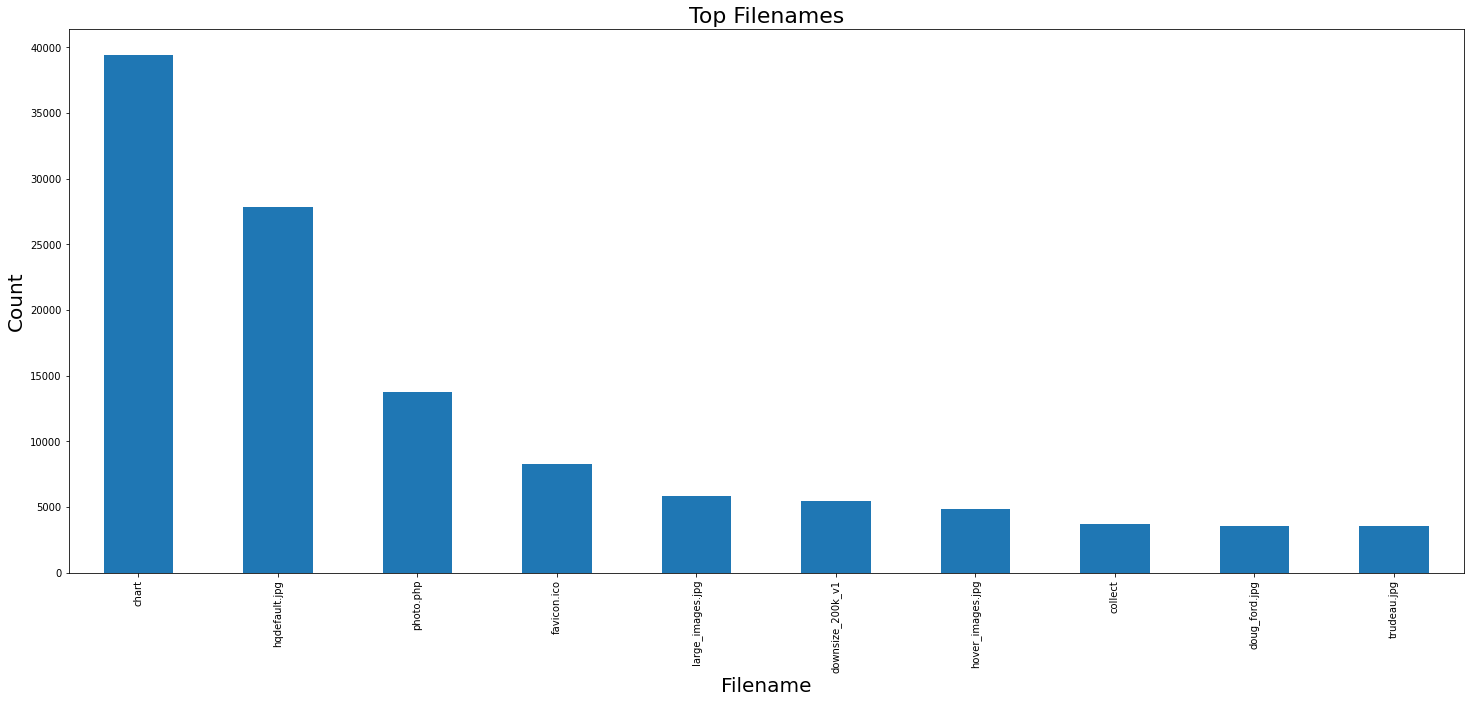

In [ ]:
top_filenames_chart = top_filenames.plot.bar(figsize=(25,10))
top_filenames_chart.set_title("Top Filenames", fontsize=22)
top_filenames_chart.set_xlabel("Filename", fontsize=20)
top_filenames_chart.set_ylabel("Count", fontsize=20)

Now let's setup Altair, and plot the data with Altair. We'll use Altair for the remaining plots we create since the plots can be easily exported as a PNG or SVG.

In [ ]:
import altair as alt

In [ ]:
top_filenames_altair = images['filename'].value_counts().head(10).rename_axis('Filename').reset_index(name='Count')

filenames_bar = alt.Chart(top_filenames_altair).mark_bar().encode(
    x='Filename:O',
    y='Count:Q'
)

filenames_rule = alt.Chart(top_filenames_altair).mark_rule(color='red').encode(
    y='mean(Count):Q'
)


filenames_text = filenames_bar.mark_text(
    align='center',
    baseline='bottom'
).encode(
    text='Count:Q'
)

(filenames_bar + filenames_rule + filenames_text).properties(width=1400, height=700, title='Top Filenames')

alt.LayerChart(...)

#### How about a MIME type distribution?

What _kind_ of image files are present? We can discover this by checking their "media type", or [MIME type](https://en.wikipedia.org/wiki/Media_type). 






In [ ]:
image_mime_types = images['mime_type_tika'].value_counts().head(5).rename_axis('MIME Type').reset_index(name='Count')

image_mimes_bar = alt.Chart(image_mime_types).mark_bar().encode(
    x='MIME Type:O',
    y='Count:Q'
)

image_mime_rule = alt.Chart(image_mime_types).mark_rule(color='red').encode(
    y='mean(Count):Q'
)

image_mime_text = image_mimes_bar.mark_text(
    align='center',
    baseline='bottom'
).encode(
    text='Count:Q'
)

(image_mimes_bar + image_mime_rule + image_mime_text).properties(width=1400, height=700, title='Images MIME Type Distribution')

alt.LayerChart(...)

#### How about the distribution of the top 10 domains?

Here we can see which domains are the most frequent within the web archive.

In [ ]:
top_domains = domains.sort_values('count', ascending=False).head(10)

top_domains_bar = alt.Chart(top_domains).mark_bar().encode(
    x=alt.X('domain:O', title='Domain'),
    y=alt.Y('count:Q', title='Count, Mean of Count')
)

top_domains_rule = alt.Chart(top_domains).mark_rule(color='red').encode(
    y='mean(count):Q'
)

top_domains_text = top_domains_bar.mark_text(
    align='center',
    baseline='bottom'
).encode(
    text='count:Q'
)

(top_domains_bar + top_domains_rule + top_domains_text).properties(width=1400, height=700, title='Domains Distribution')

alt.LayerChart(...)

### Top Level Domain Analysis
Now let's create a new column, `tld`, which is based off an existing column, 'Domain'. This example should give you an idea of how you can expand these datasets to do further research and analysis. 

A [top-level domain](https://en.wikipedia.org/wiki/Top-level_domain) refers to the highest domain in an address - i.e. `.ca`, `.com`, `.org`, or yes, even `.pizza`.

Things get a bit complicated, however, in some national TLDs. While `qc.ca` (the domain for Quebec) isn't really a top-level domain, it has many of the features of one as people can directly register under it. Below, we'll use the command `suffix` to include this. 

> You can learn more about suffixes at https://publicsuffix.org.

We'll take the `Domain` column and extract the `tld` from it with [`tldextract`](https://github.com/john-kurkowski/tldextract).

First we'll add the [`tldextract`](https://github.com/john-kurkowski/tldextract) library to the notebook. Then, we'll create the new column.

In [ ]:
%%capture

!pip install tldextract

In [ ]:
import tldextract

domains['tld'] = domains.apply(lambda row: tldextract.extract(row.domain).suffix, axis=1)
domains

domain   count  tld
0                                        news.ontario.ca  667067   ca
1                                            twitter.com  263231  com
2                            googleads.g.doubleclick.net  258230  net
3                                        data.ontario.ca  228838   ca
4                                             ontario.ca  207518   ca
...                                                  ...     ...  ...
49037  340dc4b6ce4a3baad39ad6ccfdaa179a.safeframe.goo...       1  com
49038  d1d730447b42200b84b5165d36c338fb.safeframe.goo...       1  com
49039  87847d95338d0e9e704e8fba20d5bee8.safeframe.goo...       1  com
49040  9de242284df0b079910cafb29d4836d1.safeframe.goo...       1  com
49041  a241063698690f3d971fde1b36ccbbab.safeframe.goo...       1  com

[49042 rows x 3 columns]

#### Next, let's count the distict TLDs.


In [ ]:
tld_count = domains['tld'].value_counts()
tld_count

com       41236
ca         3565
org        1272
net         630
on.ca       300
          ...  
co.ma         1
tm            1
com.pa        1
co.bw         1
com.om        1
Name: tld, Length: 318, dtype: int64

#### Next, we'll plot the TLD count.


In [ ]:
tld_count = domains['tld'].value_counts().rename_axis('TLD').reset_index(name='Count').head(10)

tld_bar = alt.Chart(tld_count).mark_bar().encode(
    x='TLD:O',
    y='Count:Q'
)

tld_rule = alt.Chart(tld_count).mark_rule(color='red').encode(
    y='mean(Count):Q'
)

tld_text = tld_bar.mark_text(
    align='center',
    baseline='bottom'
).encode(
    text='Count:Q'
)

(tld_bar + tld_rule + tld_text).properties(width=1400, height=700, title='Top Level Domain Distribution')

alt.LayerChart(...)